<a href="https://colab.research.google.com/github/mrgunjan/mrgunjan/blob/main/ANN_Regression_Insurance_Price_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')
(insurance_df).head(100)




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


#### Data Manipulation

In [ ]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Data Pre-Processing Label Encoder

In [ ]:
insurance_df['sex'].drop_duplicates()

0    female
1      male
Name: sex, dtype: object

In [ ]:
insurance_df['smoker'].drop_duplicates()

0    yes
1     no
Name: smoker, dtype: object

In [ ]:
insurance_df['region'].drop_duplicates()

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Training the LabelEncoder preprocessing model with unique values 
le.fit(insurance_df['sex'].drop_duplicates())

LabelEncoder()

In [ ]:
insurance_df['sex'] = le.transform(insurance_df['sex'])

In [ ]:
# Training the LabelEncoder preprocessing model with unique values 
le.fit(insurance_df['smoker'].drop_duplicates())
insurance_df['smoker'] = le.transform(insurance_df['smoker'])

In [ ]:
  # Training the LabelEncoder preprocessing model with unique values 
  le.fit(insurance_df['region'].drop_duplicates())
  insurance_df['region'] = le.transform(insurance_df['region'])

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#### EDA

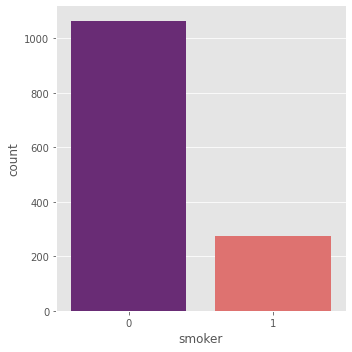

In [ ]:
# Count of Smoker & Non-Smoker
sns.catplot(x = 'smoker', kind = 'count', data = insurance_df, palette = 'magma')

In [ ]:
insurance_df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


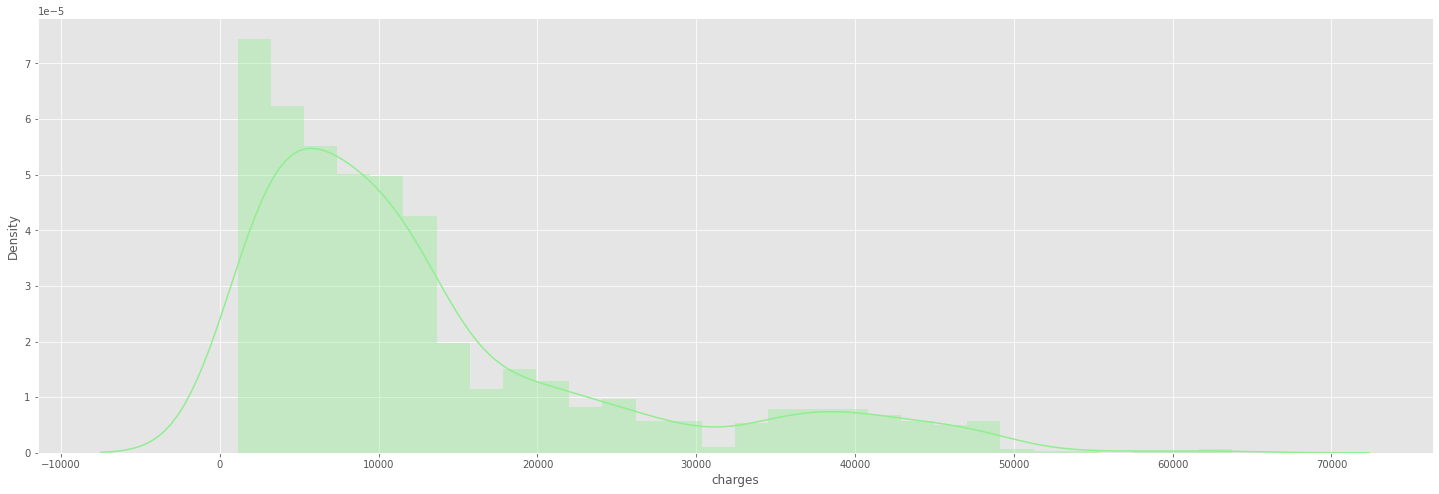

In [ ]:
plt.figure(figsize = (25,8))
sns.distplot(insurance_df['charges'], color = 'lightgreen')
plt.show()

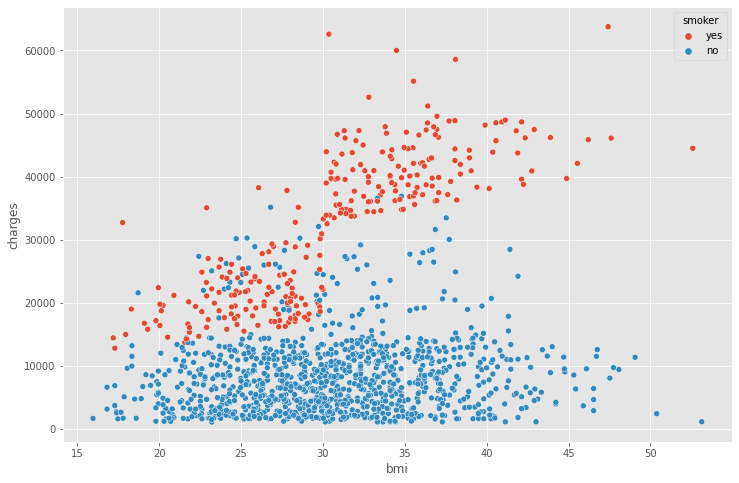

In [ ]:
### Analysis of Distribution b/w BMI & Charges
plt.style.use("ggplot")
plt.figure(figsize = (12,8))
sns.scatterplot( x = "bmi", y = "charges", data = insurance_df, hue = 'smoker')

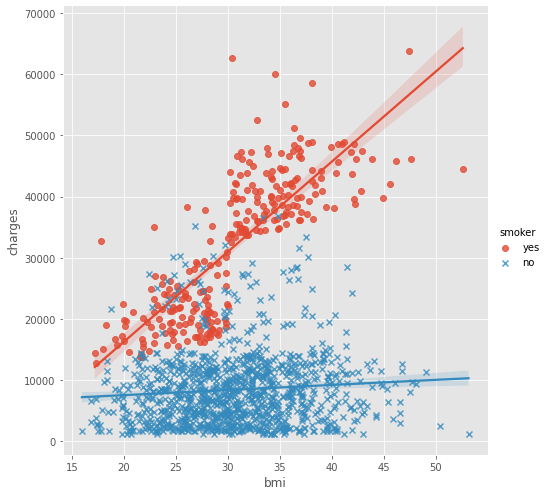

In [ ]:
#plt.style.use("ggplot")
sns.lmplot( x = "bmi", y = "charges", data = insurance_df, hue = 'smoker', markers = ["o", "x"], height=7)

#### Correlation
  * For features selection

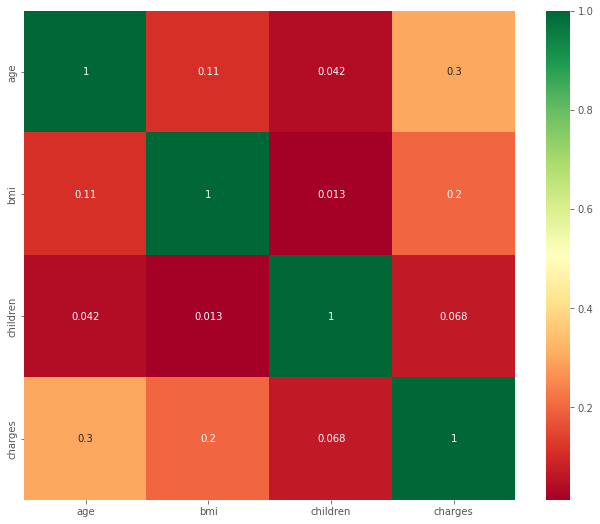

In [ ]:
plt.figure(figsize = (11,9))
# -1 to +1 -> > + or -0.85 , closer to 0 (not to select the these features)
sns.heatmap(insurance_df.corr(), annot = True, cmap = 'RdYlGn')

#### Split into Train & Test

In [ ]:
X = insurance_df.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
Y = insurance_df['charges']

#### Cross Validation 
  * Splitting samples into train & test samples randomnly

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
len(x_train)

1070

#### ANN Regression

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def build_model():
    # Sequential Neural Network - FeedForward NN
    model = Sequential()
    # Units = Num of Neurons (2 * pow(n)), input shape = num of features.
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - Regression
    model.add(Dense(units = 1))
    
    # Optimizers - To converge the loss
    optimizers = RMSprop(learning_rate = 0.001)

    # Model Compiler
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                                  'mean_absolute_error'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# epochs = Number of Iterations
# batch size = samples per steps in each epochs
history = model.fit(x_train, y_train, epochs = 700, batch_size = 25, validation_split = 0.2)

Epoch 1/700
35/35 [==============================] - 0s 5ms/step - loss: 21366800.0000 - mean_squared_error: 21366800.0000 - mean_absolute_error: 2716.9121 - val_loss: 35286972.0000 - val_mean_squared_error: 35286972.0000 - val_mean_absolute_error: 3837.6919
Epoch 2/700
35/35 [==============================] - 0s 5ms/step - loss: 20829724.0000 - mean_squared_error: 20829724.0000 - mean_absolute_error: 2681.8887 - val_loss: 36279408.0000 - val_mean_squared_error: 36279408.0000 - val_mean_absolute_error: 4266.5576
Epoch 3/700
35/35 [==============================] - 0s 5ms/step - loss: 20880284.0000 - mean_squared_error: 20880284.0000 - mean_absolute_error: 2704.2036 - val_loss: 37572108.0000 - val_mean_squared_error: 37572108.0000 - val_mean_absolute_error: 3102.7869
Epoch 4/700
35/35 [==============================] - 0s 5ms/step - loss: 20868912.0000 - mean_squared_error: 20868912.0000 - mean_absolute_error: 2686.0286 - val_loss: 36722552.0000 - val_mean_squared_error: 36722552.0000 -

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()

##### NN Reg. Model Performance

In [ ]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 20051388.0000 - mean_squared_error: 20051388.0000 - mean_absolute_error: 2569.3333


[20051388.0, 20051388.0, 2569.333251953125]

In [ ]:
# Yhat
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
# coeff of determination (0-1) 
# variance of predicted o/p from actual o/p
r2_score(y_test, predictions)

0.8739936337588795

In [ ]:
# RMSE 
from sklearn.metrics import mean_squared_error
# MSE
np.sqrt(mean_squared_error(y_test, predictions))

4477.877657138198

#### Making New Prediction

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
x_new = [[29,	1,	37.61,	1,	1,	3]]

In [ ]:
np.round(model.predict(x_new))

array([[39369.]], dtype=float32)